In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource,  HoverTool, Legend
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

## Загрузка и знакомство с данными

In [7]:
df = pd.read_csv('~/IIS/data/CarData.csv')
display(df.head(10))

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


## Очистка данных

In [8]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [9]:
df['Car_Name'] = df['Car_Name'].astype('category')
df['Fuel_Type'] = df['Fuel_Type'].astype('category')
df['Transmission'] = df['Transmission'].astype('category')
df['Selling_type'] = df['Selling_type'].astype('category')

In [10]:

df['Year'] = df['Year'].astype('int16')
df['Selling_Price'] = df['Selling_Price'].astype('float16')
df['Present_Price'] = df['Present_Price'].astype('float16')
df['Owner'] = df['Owner'].astype('int8')

In [11]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Car_Name       301 non-null    category
 1   Year           301 non-null    int16   
 2   Selling_Price  301 non-null    float16 
 3   Present_Price  301 non-null    float16 
 4   Driven_kms     301 non-null    int64   
 5   Fuel_Type      301 non-null    category
 6   Selling_type   301 non-null    category
 7   Transmission   301 non-null    category
 8   Owner          301 non-null    int8    
dtypes: category(4), float16(2), int16(1), int64(1), int8(1)
memory usage: 8.9 KB


In [12]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.660156,7.628906,36947.205980,0.043189
std,2.891554,5.082031,8.648438,38886.883882,0.247915
min,2003.000000,0.099976,0.320068,500.000000,0.000000
25%,2012.000000,0.899902,1.200195,15000.000000,0.000000
50%,2014.000000,3.599609,6.398438,32000.000000,0.000000
75%,2016.000000,6.000000,9.898438,48767.000000,0.000000
max,2018.000000,35.000000,92.625000,500000.000000,3.000000


In [13]:
cat_features = df.select_dtypes(include=['category']).columns.to_list()
cat_features

['Car_Name', 'Fuel_Type', 'Selling_type', 'Transmission']

In [14]:
num_features = df.select_dtypes(include=['number']).columns.to_list()
num_features

['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Owner']

In [15]:
for cat in cat_features:
    print(f'{cat} - numer of unique = {df[cat].nunique()}')

Car_Name - numer of unique = 98
Fuel_Type - numer of unique = 3
Selling_type - numer of unique = 2
Transmission - numer of unique = 2


In [16]:
for col in cat_features:
    print(f'Unique categories in {col}: {df[col].value_counts()}')

Unique categories in Car_Name: Car_Name
city                      26
corolla altis             16
verna                     14
fortuner                  11
brio                      10
                          ..
Hero Passion X pro         1
Hero Hunk                  1
camry                      1
Hero Honda Passion Pro     1
800                        1
Name: count, Length: 98, dtype: int64
Unique categories in Fuel_Type: Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Unique categories in Selling_type: Selling_type
Dealer        195
Individual    106
Name: count, dtype: int64
Unique categories in Transmission: Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


## Очистка данных

Я думаю, что очищать данные не стоит, так как выглядит все довольно правдоподобно, df.describe() показал, что все данные валидны

## Анализ признаков для модели

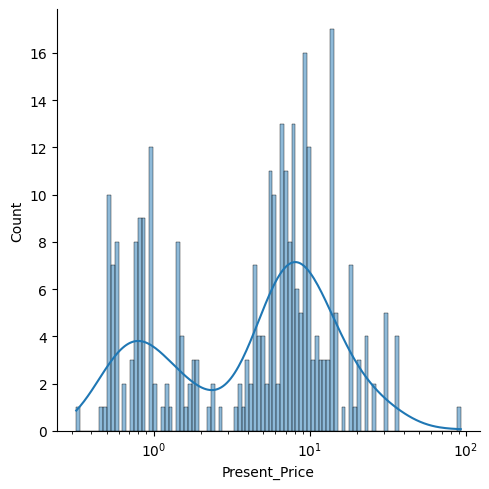

In [17]:
fig = sns.displot(df, x='Present_Price', bins=100, kde=True, log_scale=True)
fig.savefig('graph7')

На изображении представлен график гистограммы с наложенной линией плотности для переменной Present_Price на логарифмической шкале по оси X. Вот основные наблюдения и выводы:

*   Гистограмма показывает распределение значений Present_Price. Судя по частоте, переменная имеет значительное количество значений в диапазоне от 1 до 10 (в логарифмическом масштабе). Это означает, что большинство значений цены сосредоточено в этом диапазоне, и меньшее количество значений выходит за пределы 10.
*   Судя по линии плотности, данные имеют несколько пиков (мод), что указывает на мультимодальное распределение. Это означает, что есть несколько различных групп значений, в которых данные сконцентрированы.
*  Линия плотности указывает на правостороннюю скошенность (положительная скошенность), так как хвост графика уходит вправо. Это говорит о том, что в данных есть несколько высоких значений, которые находятся далеко от основной массы данных.





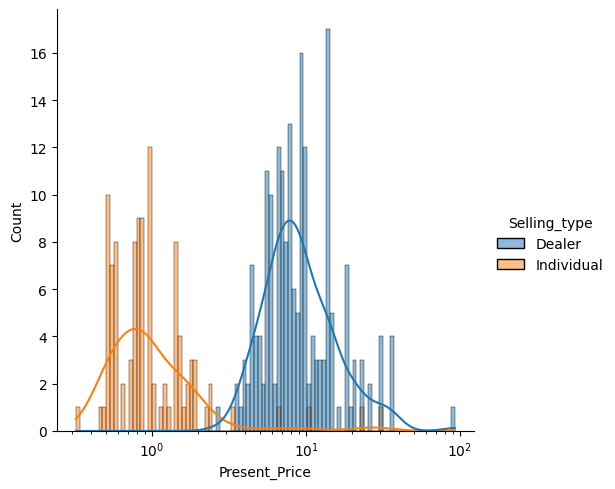

In [18]:
fig = sns.displot(df, x='Present_Price', bins=100, hue = 'Selling_type',  kde=True, log_scale=True)

На изображении представлена гистограмма с наложенными линиями плотности для переменной Present_Price, разделённая по двум категориям: Dealer (продавец-дилер) и Individual (частный продавец). Вот основные наблюдения и выводы:

* Для Dealer (обозначено синим цветом) видно, что цены сосредоточены в диапазоне от 10 до 20 в логарифмическом масштабе. Это означает, что дилеры чаще продают товары с более высокой ценой.
* Для Individual (обозначено оранжевым цветом) цены сконцентрированы в диапазоне от 1 до 10 в логарифмическом масштабе. Это указывает на то, что частные продавцы продают товары с более низкой ценой.
* Явное различие в распределении цен между дилерами и частными продавцами. Частные продавцы склонны предлагать товары по более низким ценам, в то время как дилеры чаще продают товары по более высоким ценам.
* Видно, что распределения практически не пересекаются. Это может свидетельствовать о различной аудитории или товарах, которые предлагаются разными типами продавцов.


<Axes: >

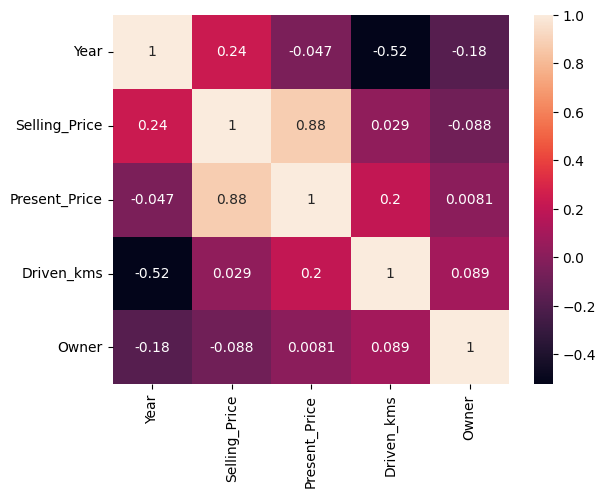

In [19]:
feature_correlation = df[num_features].corr()
sns.heatmap(feature_correlation, annot=True)

На изображении представлена корреляционная матрица с цветовой шкалой, которая показывает коэффициенты корреляции между различными переменными: Year (год выпуска), Selling_Price (цена продажи), Present_Price (текущая цена), Driven_kms (пробег в километрах) и Owner (владельцы).
* Текущая цена автомобиля (Present_Price) является основным фактором, влияющим на цену его продажи (Selling_Price). Это логично, так как текущая рыночная стоимость напрямую связана с ценой продажи.
*  Количество владельцев практически не влияет на остальные параметры, что может означать, что покупатели больше ориентируются на другие характеристики автомобиля, такие как текущая цена, пробег и возраст.
* Старые автомобили с большим пробегом обычно стоят дешевле, что подтверждается отрицательной корреляцией между Driven_kms и Year.

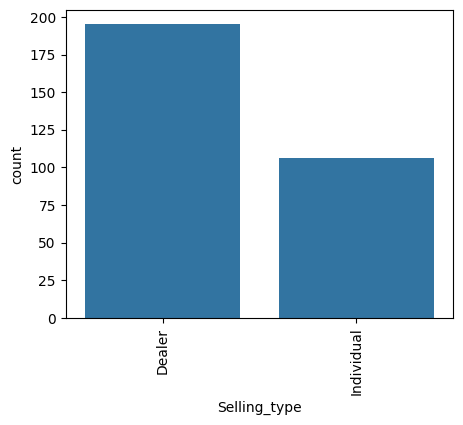

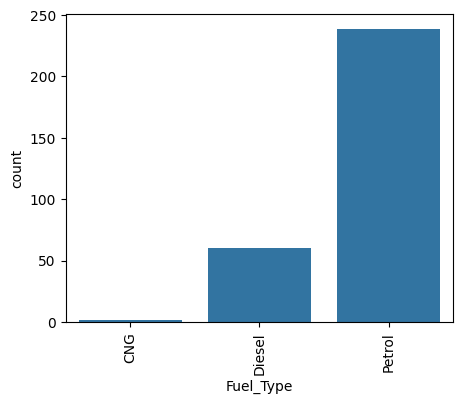

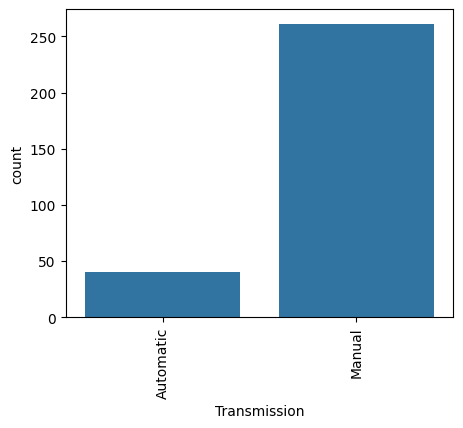

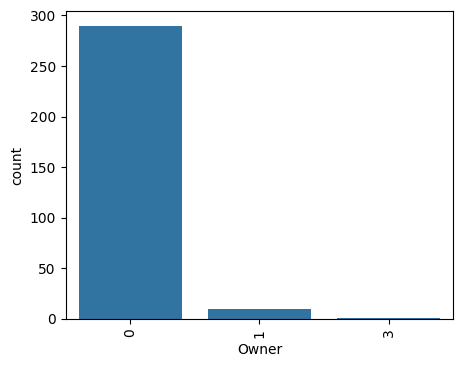

In [20]:
columns = ['Selling_type', 'Fuel_Type', 'Transmission', 'Owner']

for column in columns:
    plt.figure(figsize = (5,4))
    sns.countplot(x = column, data = df)
    plt.xticks(rotation = 90)
    plt.show()

На изображениях представлены столбчатые диаграммы, каждая из которых отображает количество наблюдений (count) для различных категорий по различным переменным.
*  Распределение Selling_type (Тип продаж): в выборке значительно больше автомобилей, продаваемых через дилеров, чем частными лицами. Это может указывать на преобладание профессиональных продавцов в данных или на предпочтение покупателей обращаться к дилерам.
* Распределение Fuel_Type (Тип топлива): большинство автомобилей в выборке работают на бензине, что может отражать предпочтения на рынке или структуру набора данных. Доля дизельных автомобилей значительно меньше, а автомобили на сжатом природном газе практически отсутствуют.
* Распределение Transmission (Коробка передач): большинство автомобилей оснащены механической коробкой передач. Это может свидетельствовать о предпочтении на рынке или о фокусе выборки на более дешевые модели, так как механические коробки передач часто используются в бюджетных автомобилях.
* Распределение Owner (Количество владельцев): большинство автомобилей имеют новые и не имеют владельцев.  Это может означать, что в выборке преобладают относительно новые автомобили или те, которые владельцы продают вскоре после покупки. Наличие одного владельца может также свидетельствовать о высоком уровне доверия покупателей.


In [21]:
source = ColumnDataSource(data=df.sample(frac=0.1))
p = figure(width=1000)
p.scatter(source=source, x='Year', y='Present_Price' )

hover = HoverTool(tooltips=[('Selling_type', '@Selling_type'),
                              ('Owner', '@Owner'),
                              ('Fuel_type', '@Fuel_Type')])

p.add_tools(hover)
show(p)

На изображении представлен точечный график (scatter plot), который отображает связь между двумя переменными: годом выпуска автомобиля и ценой по оси Y.
* Точки, соответствующие разным годам, распределены достаточно равномерно, хотя и с некоторыми периодами более высокой плотности в середине графика (около 2010-2016 годов).
* Большинство значений находится в нижней части графика (до 15), что может указывать на преобладание автомобилей с низкой ценой.
* Видно, что по мере приближения к настоящему времени (2018 год) цены на автомобили начинают снижаться, большинство точек находится ближе к нижней части графика. Это естественное снижение стоимости по мере устаревания автомобилей.

## Сохранение очищенного датасета

In [22]:
df.to_pickle('~/IIS/data/CleanCarData.pkl')

## На основе всех представленных графиков можно сделать следующие выводы о наборе данных:
большая часть автомобилей продается через дилеров, а не частными лицами. Это указывает на то, что в выборке преобладают профессиональные продавцы, что может говорить о том, что данные содержат информацию о торговле подержанными автомобилями, возможно, с участием дилеров и автосалонов.Преобладание механической коробки передач указывает на то, что в данных больше бюджетных моделей автомобилей, которые часто оснащаются механической трансмиссией. Автомобили с автоматической коробкой передач составляют меньшинство.Цена продажи (Selling_Price) сильно коррелирует с текущей рыночной ценой (Present_Price), что логично и указывает на то, что текущая рыночная стоимость является важным фактором при продаже автомобилей.
